In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 로지스틱
from statsmodels.api import Logit

# 데이터 분할, 의사결정나무, 랜덤포레스트 모델
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MPLClassifier)
from sklearn.neural_network import MLPClassifier

# 카이제곱 검정
import scipy.stats as stats

# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

# ANOVA 분석
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

- PLATE_NO	        -    Plate No		              -             ID	      범주형
- ROLLING_DATE	    -      작업시각		              -            제외	    연속형
- SCALE		        -      Scale불량		            -            목표변수	범주형
- SPEC		        -      제품 규격		          -            설명변수   범주형
- STEEL_KIND	    -      강종		                -            설명변수	범주형
- PT_THICK	        -      Plate 두께		            -            설명변수	연속형
- PT_WIDTH	        -      Plate 폭		             -            설명변수	 연속형
- PT_LENGTH	        -      Plate 길이	                -            설명변수	연속형
- PT_WEIGHT	        -      Plate 중량	                -            설명변수	연속형
- FUR_NO		    -      가열로 호기	             -            설명변수	 범주형
- FUR_NO_ROW	    -      가열로 작업순번	           -            설명변수   연속형
- FUR_HZ_TEMP	    -      가열로 가열대 온도         -            설명변수	  연속형
- FUR_HZ_TIME	    -      가열로 가열대 시간         -            설명변수	  연속형
- FUR_SZ_TEMP	    -      가열로 균열대 온도         -            설명변수	  연속형
- FUR_SZ_TIME	    -      가열로 균열대 시간         -            설명변수	  연속형
- FUR_TIME	        -      가열로 시간		         -            설명변수	 연속형
- FUR_EXTEMP	    -      추출온도		              -            설명변수	  연속형
- ROLLING_TEMP_T5	-      압연온도		              -            설명변수    연속형
- HSB	            -      HSB적용(1-적용,0-미적용)   -            설명변수    범주형
- ROLLING_DESCALING	-      압연 중 Descaling 횟수	 -            설명변수    연속형
- WORK_GR	        -      작업조		               -            설명변수    범주형

In [2]:
df = pd.read_csv('SCALE불량.csv', encoding='euc-kr', parse_dates = ['ROLLING_DATE'])
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [3]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

None

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [4]:
df = df.drop(['PLATE_NO', 'ROLLING_DATE'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267417449D0>,
      dtype=object)

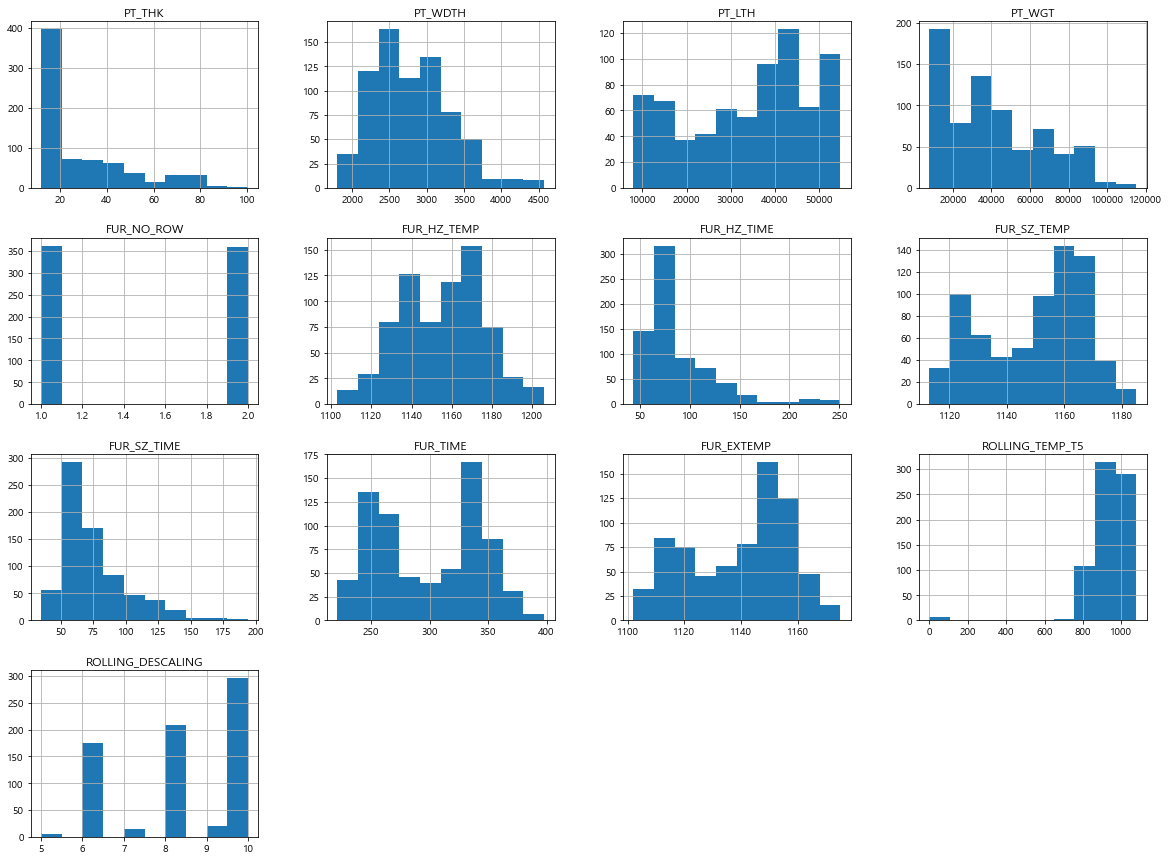

In [5]:
df.hist(figsize=(20,15))

In [207]:
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes('object')

array([[<AxesSubplot:title={'center':'PT_THK'}>,
        <AxesSubplot:title={'center':'PT_WDTH'}>,
        <AxesSubplot:title={'center':'PT_LTH'}>,
        <AxesSubplot:title={'center':'PT_WGT'}>],
       [<AxesSubplot:title={'center':'FUR_NO_ROW'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_SZ_TEMP'}>],
       [<AxesSubplot:title={'center':'FUR_SZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_TIME'}>,
        <AxesSubplot:title={'center':'FUR_EXTEMP'}>,
        <AxesSubplot:title={'center':'ROLLING_TEMP_T5'}>],
       [<AxesSubplot:title={'center':'ROLLING_DESCALING'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

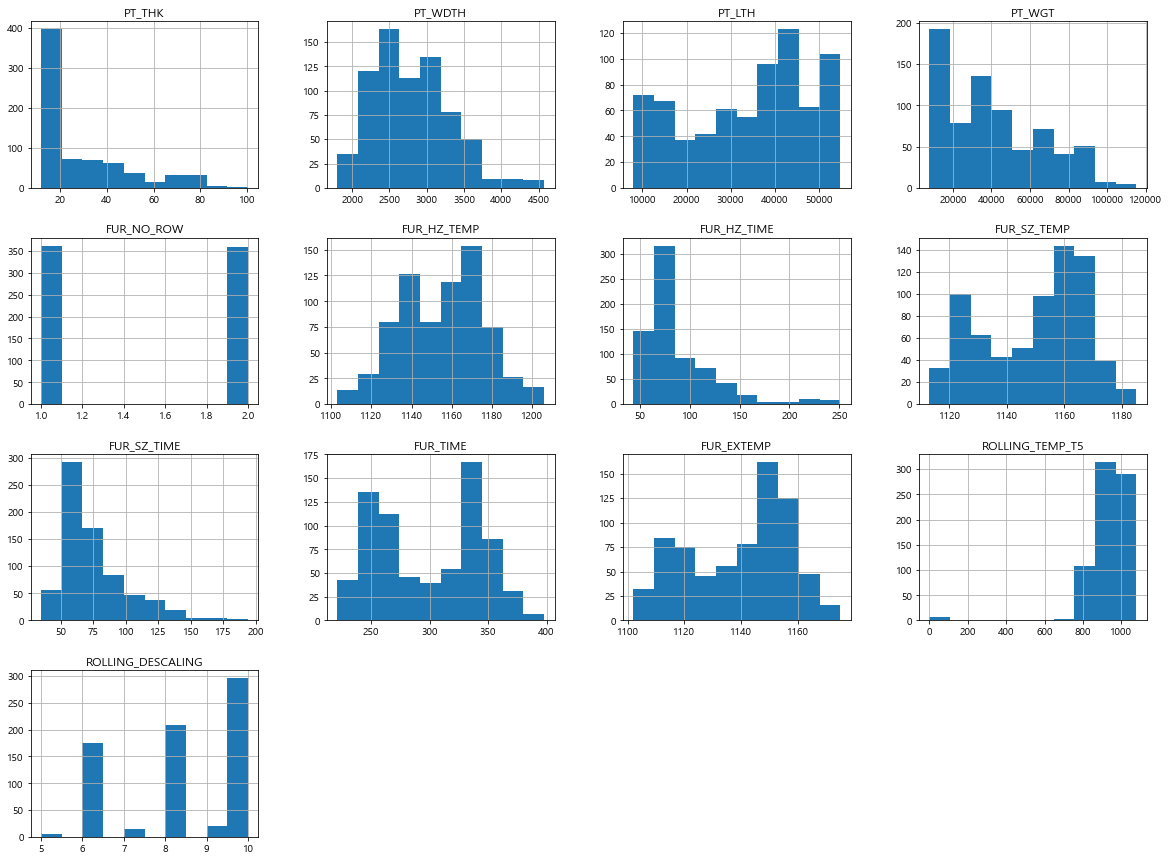

In [208]:
df_num.hist(figsize=(20,15))

In [209]:
df_obj.columns

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'HSB', 'WORK_GR'], dtype='object')

<AxesSubplot:xlabel='WORK_GR', ylabel='count'>

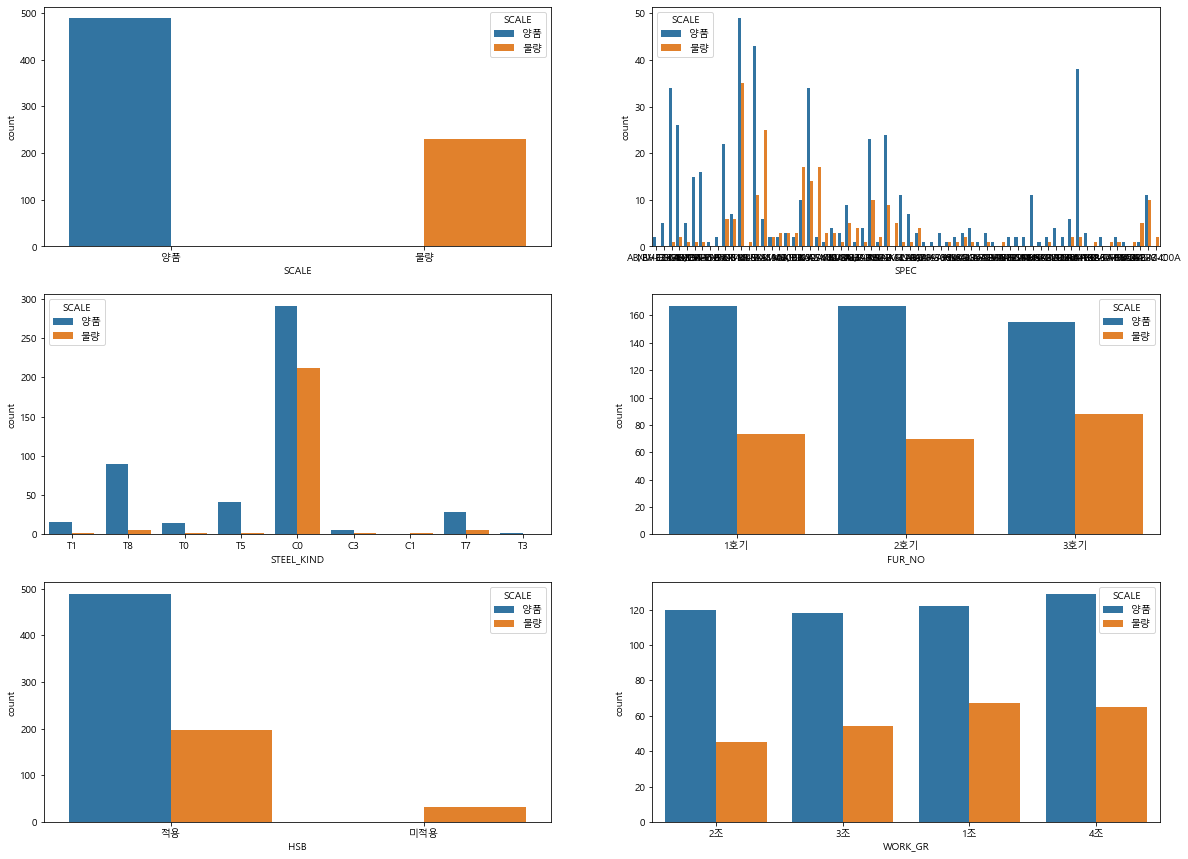

In [210]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.countplot('SCALE', data=df, hue='SCALE')
plt.subplot(3,2,2)
sns.countplot('SPEC', data=df, hue='SCALE')
plt.subplot(3,2,3)
sns.countplot('STEEL_KIND', data=df, hue='SCALE')
plt.subplot(3,2,4)
sns.countplot('FUR_NO', data=df, hue='SCALE')
plt.subplot(3,2,5)
sns.countplot('HSB', data=df, hue='SCALE')
plt.subplot(3,2,6)
sns.countplot('WORK_GR', data=df, hue='SCALE')

In [211]:
df_num.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [212]:
num_big = df[['PT_LTH', 'PT_WGT']]
num_mid = df[['PT_WDTH', 'FUR_HZ_TEMP', 'FUR_SZ_TEMP', 'FUR_EXTEMP', 'FUR_TIME', 'ROLLING_TEMP_T5']]
num_small = df[['PT_THK', 'FUR_NO_ROW', 'FUR_HZ_TIME', 'FUR_SZ_TIME', 'ROLLING_DESCALING']]

<AxesSubplot:>

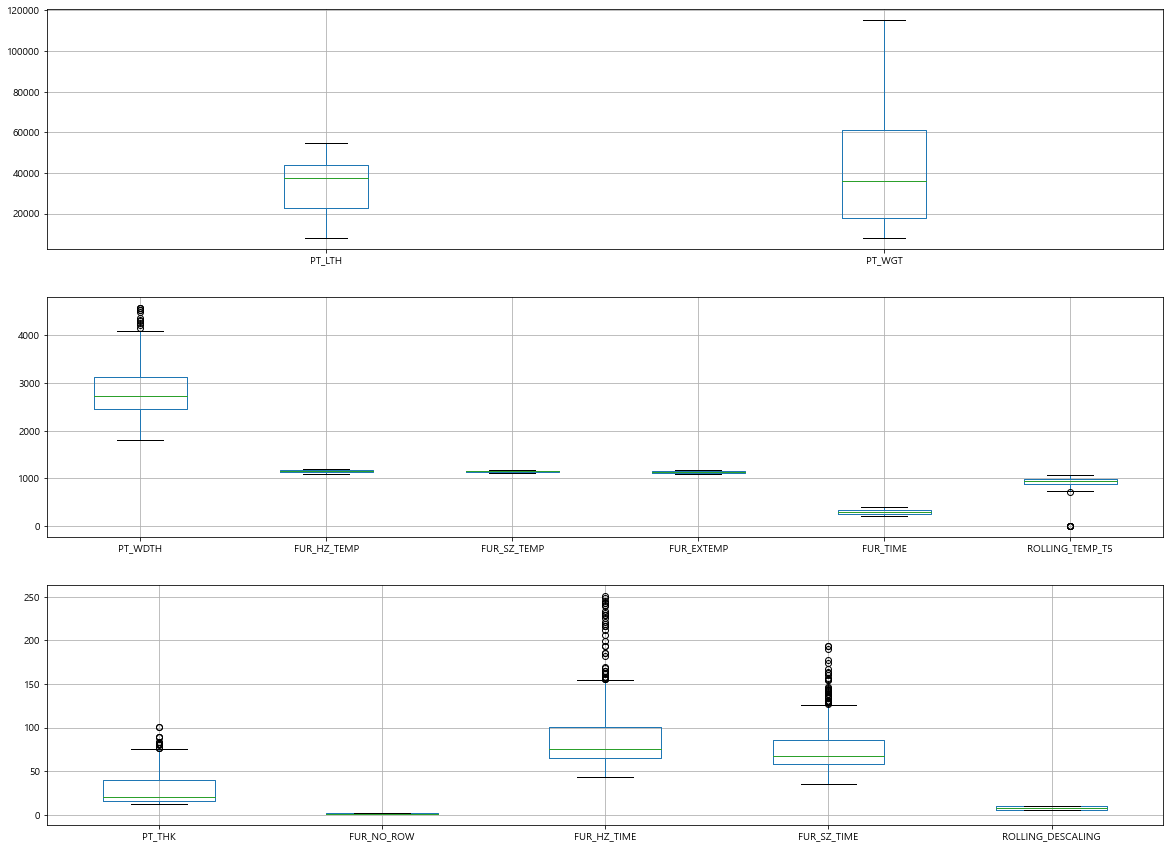

In [213]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
num_big.boxplot()
plt.subplot(3,1,2)
num_mid.boxplot()
plt.subplot(3,1,3)
num_small.boxplot()

In [215]:
df.drop(df.loc[df['ROLLING_TEMP_T5'] <= 0].index, inplace=True)

Text(0.5, 1.0, 'ROLLING_TEMP_T5')

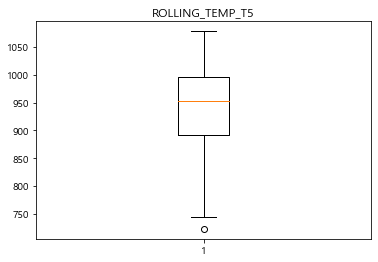

In [218]:
plt.boxplot(df['ROLLING_TEMP_T5'])
plt.title('ROLLING_TEMP_T5')

<AxesSubplot:ylabel='SCALE'>

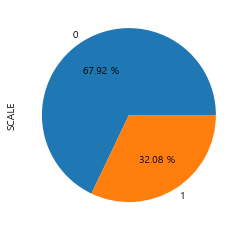

In [81]:
df['SCALE'] = np.where(df['SCALE'] == '양품', 0, 1)
df['SCALE'].value_counts().plot.pie(autopct='%.2f %%')

[Text(0, 0, 'AB/EH32-TM'),
 Text(1, 0, 'NV-E36-TM'),
 Text(2, 0, 'BV-EH36-TM'),
 Text(3, 0, 'COMMON'),
 Text(4, 0, 'GL-E32-TM'),
 Text(5, 0, 'GL-E36-TM'),
 Text(6, 0, 'AB/EH36-TM'),
 Text(7, 0, 'KS-HSB600'),
 Text(8, 0, 'LR-EH36-TM'),
 Text(9, 0, 'BV-B'),
 Text(10, 0, 'LR-B'),
 Text(11, 0, 'JS-SM490YB'),
 Text(12, 0, 'KR-B'),
 Text(13, 0, 'LR-A'),
 Text(14, 0, 'JS-SM490A'),
 Text(15, 0, 'KS-SM400B'),
 Text(16, 0, 'JS-SM400B'),
 Text(17, 0, 'AB/B'),
 Text(18, 0, 'KS-SS400'),
 Text(19, 0, 'KR-A'),
 Text(20, 0, 'NV-A'),
 Text(21, 0, 'JS-SS400'),
 Text(22, 0, 'KS-SM400A'),
 Text(23, 0, 'KS-SM490B'),
 Text(24, 0, 'V42JBN3'),
 Text(25, 0, 'BV-AH32'),
 Text(26, 0, 'JS-SM490YA'),
 Text(27, 0, 'AB/AH32'),
 Text(28, 0, 'LR-AH32'),
 Text(29, 0, 'NV-B'),
 Text(30, 0, 'NV-A32'),
 Text(31, 0, 'KS-SM490A'),
 Text(32, 0, 'NK-KA32'),
 Text(33, 0, 'GL-A32'),
 Text(34, 0, 'AB/A'),
 Text(35, 0, 'LR-AH36'),
 Text(36, 0, 'A709-36'),
 Text(37, 0, 'KR-AH32'),
 Text(38, 0, 'A516-60'),
 Text(39, 0, 'GL-A'),
 Te

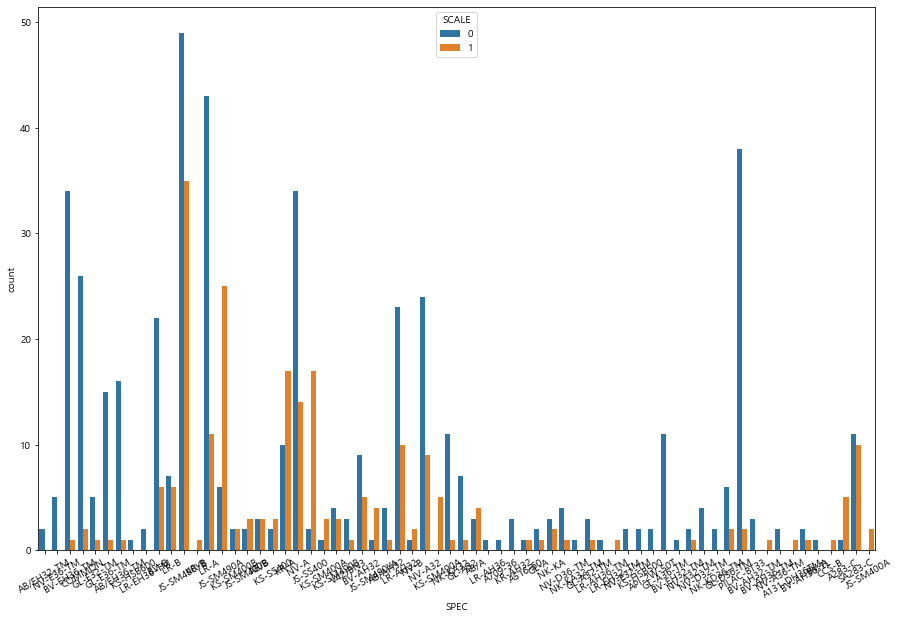

In [11]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df['SPEC'], hue=df['SCALE'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [12]:
df[['SPEC','SCALE']].groupby(['SPEC']).count()

,SCALE
SPEC,
A131-DH36TM,1
A283-C,6
A516-60,2
A709-36,1
AB/A,7
...,...
NV-E32-TM,2
NV-E36-TM,5
PILAC-BT33,40


In [13]:
# ANOVA 검정 결과, P < 0.05로 유의미한 차이가 있음
model = ols('SCALE ~ C(SPEC)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(SPEC),65.0,46.047021,0.708416,4.179916,1.594716e-21
Residual,654.0,110.840479,0.169481,NaN,NaN


Text(0.5, 1.0, 'HSB 미적용')

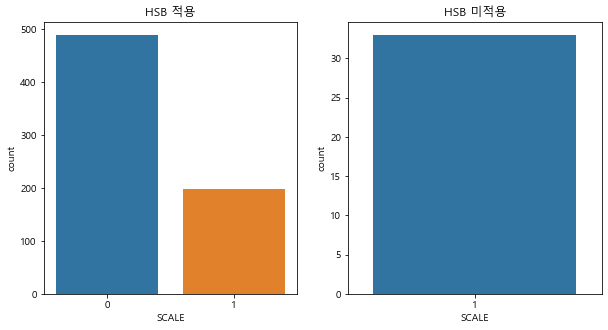

In [14]:
df_hsb_0 = df[df['HSB'] == '적용'].loc[:,['SCALE']]
df_hsb_1 = df[df['HSB'] == '미적용'].loc[:,['SCALE']]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot('SCALE', data=df_hsb_0)
plt.title('HSB 적용')

plt.subplot(1,2,2)
sns.countplot('SCALE', data=df_hsb_1)
plt.title('HSB 미적용')

In [15]:
hsb_result = pd.crosstab(df.HSB, df.SCALE)
display(hsb_result)

chi, pval, dof, expected = stats.chi2_contingency(observed = hsb_result)
print('chi-square test')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:.3f}'.format(pval))

SCALE,0,1
HSB,,
미적용,0,33
적용,489,198


chi-square test
chisq : 69.983
p : 0.000


In [16]:
# HSB 미적용 시, 무조건 불량이 발생

In [20]:
df['SCALE'] = df['SCALE'].astype('int64')
df.select_dtypes(['int64','float64']).corr()[['SCALE']]

,SCALE
SCALE,1.000000
PT_THK,-0.124858
PT_WDTH,-0.206021
PT_LTH,0.100475
PT_WGT,0.218741
FUR_NO_ROW,-0.022960
FUR_HZ_TEMP,0.247670
FUR_HZ_TIME,0.064466
FUR_SZ_TEMP,0.374809
FUR_SZ_TIME,-0.255138


In [21]:
df_y = df['SCALE']
df_x = df.drop('SCALE', axis=1 )
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234)
print(df_train.shape); print(df_test.shape)

(504, 19)
(216, 19)


In [22]:
display(df_num.columns, df_obj.columns)

Index(['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'ROLLING_DESCALING'],
      dtype='object')

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'HSB', 'WORK_GR'], dtype='object')

In [27]:
log_model = Logit.from_formula("""SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + ROLLING_DESCALING + C(FUR_NO) + C(WORK_GR) + C(SPEC)""", df_train)

log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.251222
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      426
Method:                           MLE   Df Model:                           77
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.5980
Time:                        03:04:27   Log-Likelihood:                -126.62
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 4.775e-41
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -188.4026   2120.643     -0.089      0.929   -4344.787    3967.982
C(FUR_NO)[T.2호기]         -0.3760

Text(0.5, 0, '변수 중요도')

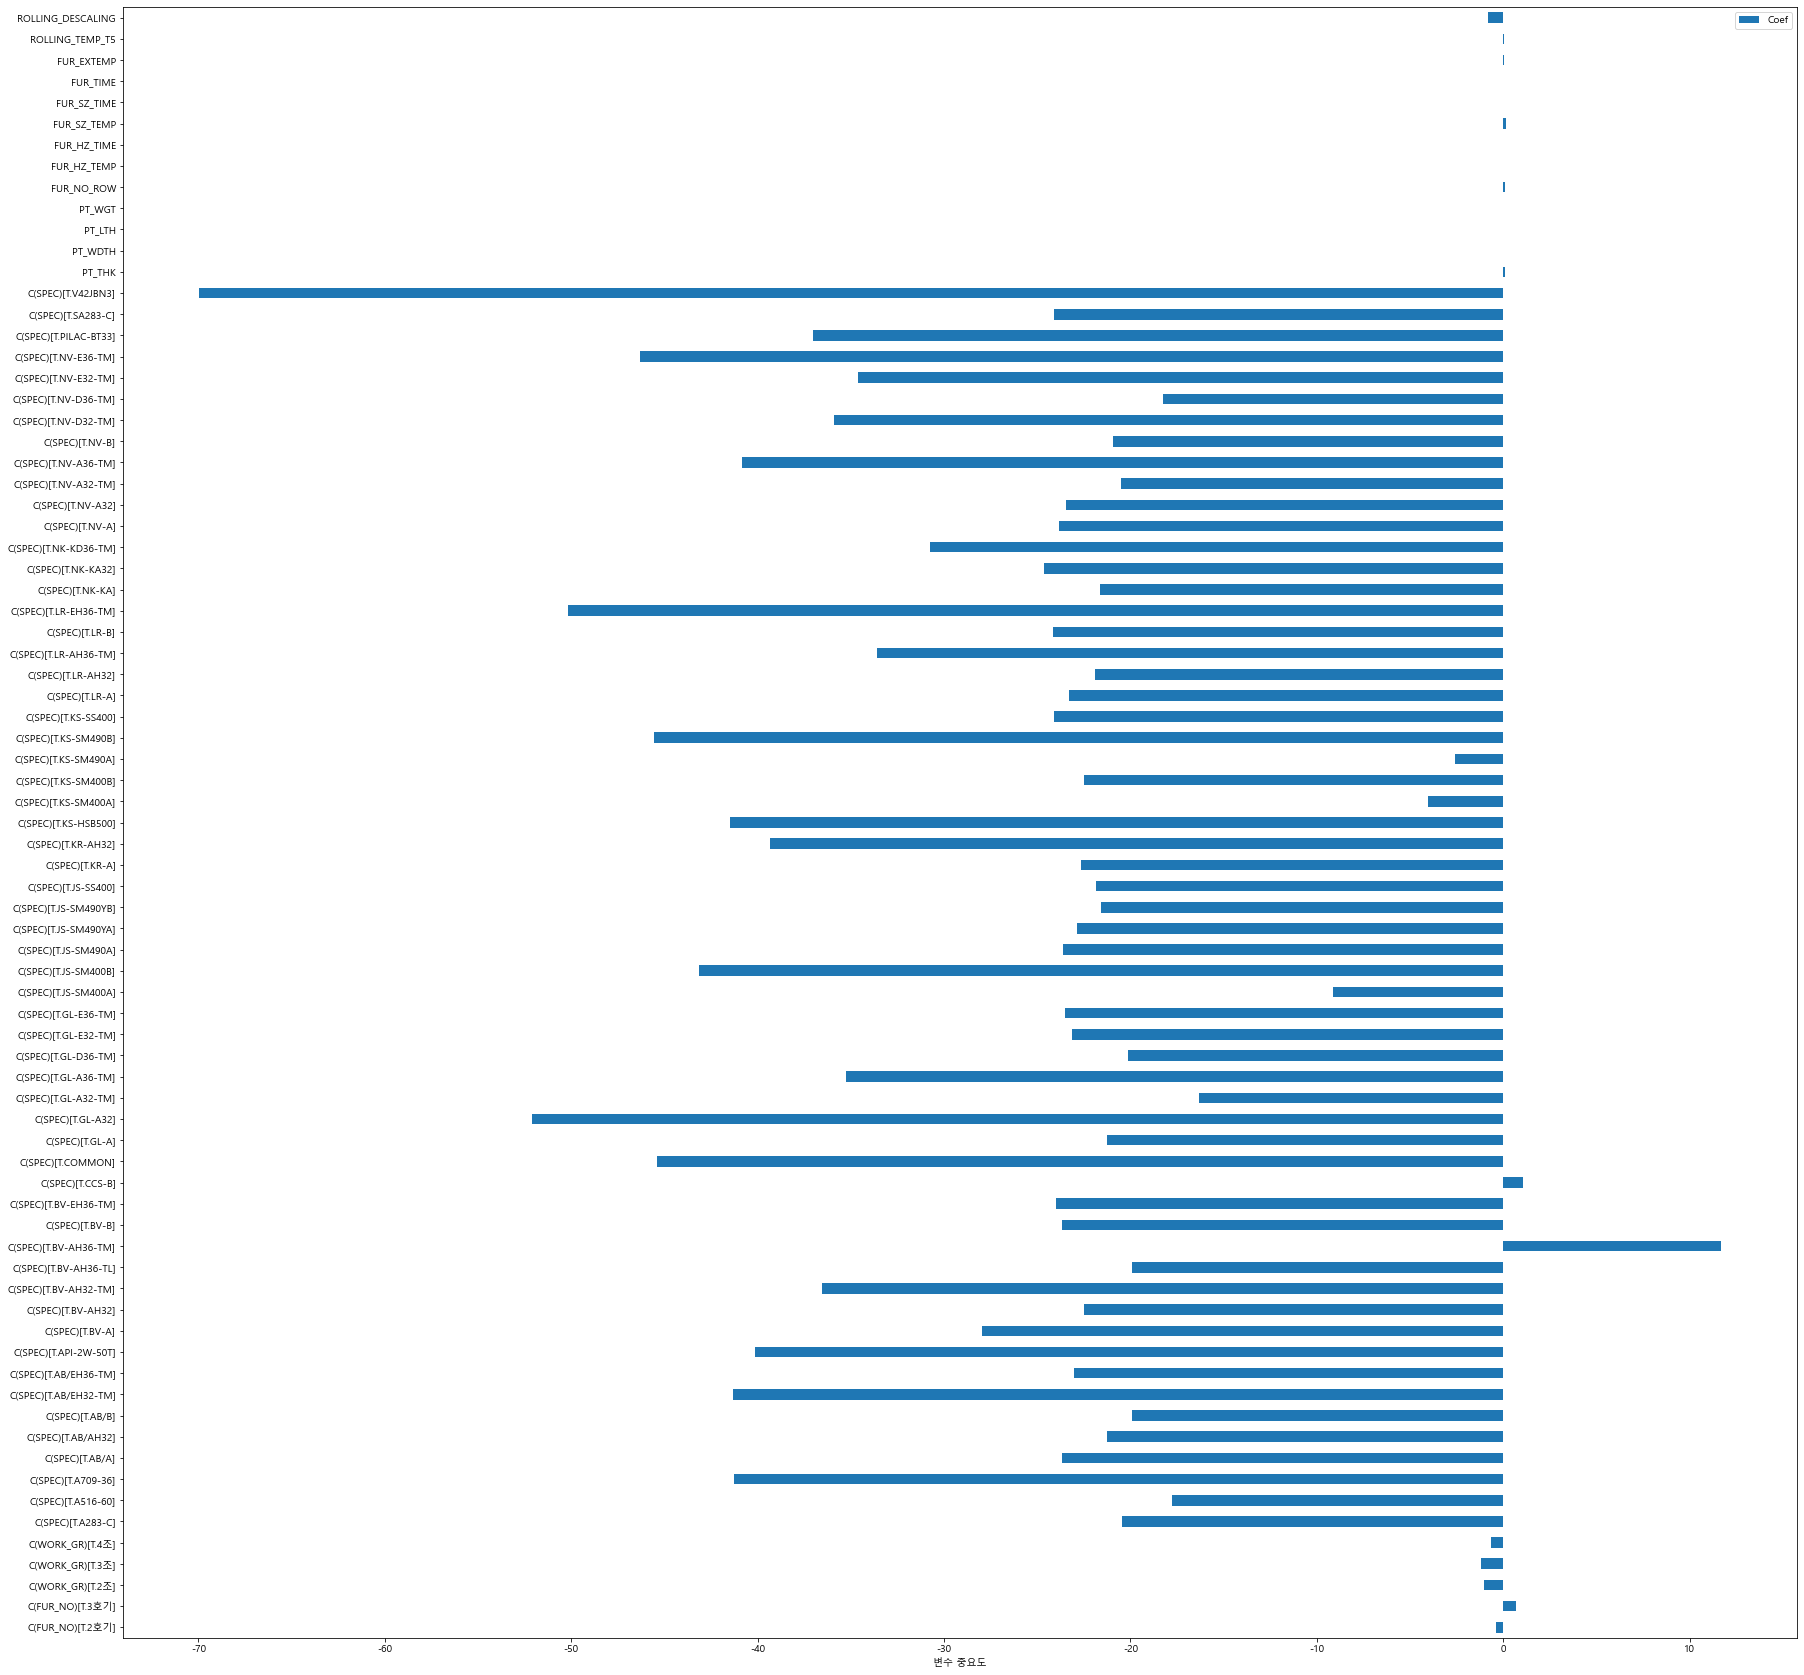

In [39]:
df_logistic_coef = pd.DataFrame({'Coef' : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef', figsize=(30,30))
plt.xlabel('변수 중요도')

In [43]:
df_x = df.drop('SCALE', axis=1)
df_y = df['SCALE']
df_x_dum = pd.get_dummies(df_x)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dum, df_y, test_size = 0.3, random_state = 1234)

tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.995


In [45]:
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1,11)]

Text(0.5, 1.0, 'max_depth')

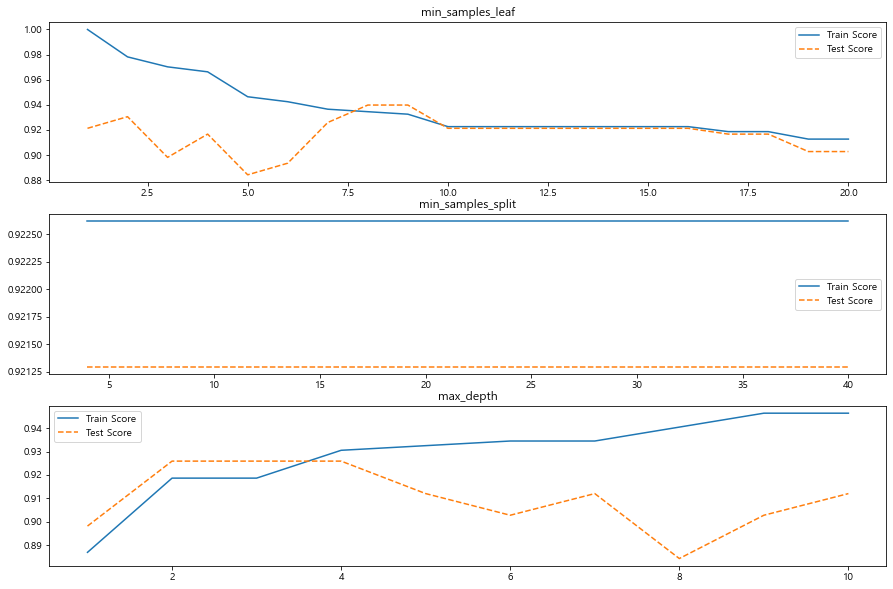

In [50]:
# --------------
train_score = []; test_score = []

for v_min_samples_leaf in para_leaf:
    rf = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_leaf')

# --------------
train_score = []; test_score = []

for v_min_samples_split in para_split:
    rf = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=10, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(3,1,2)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_split')

# --------------
train_score = []; test_score = []
for v_max_depth in para_depth:
    rf = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=5, min_samples_split = 10, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(3,1,3)    
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('max_depth')

<Figure size 1080x720 with 0 Axes>

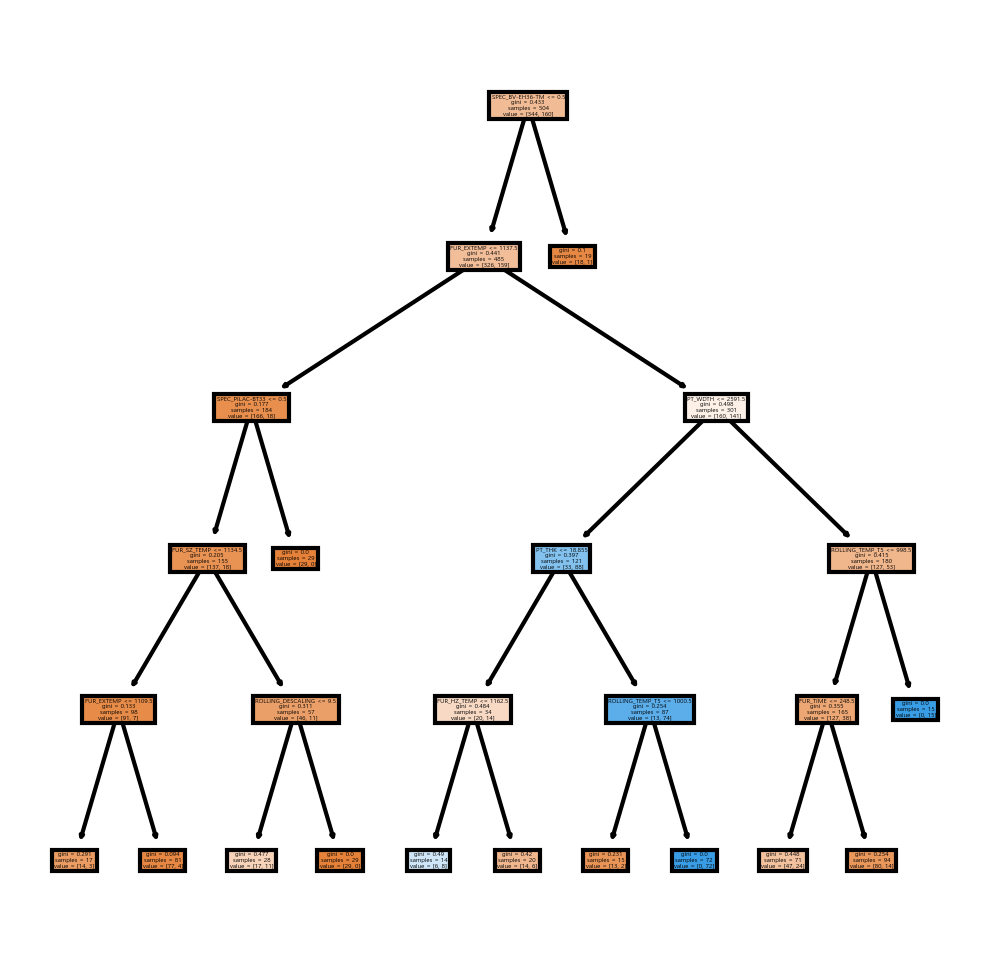

In [58]:
tree_final = DecisionTreeClassifier(random_state=1234,  min_samples_leaf=10, min_samples_split=10, max_depth = 5, max_features='sqrt')
tree_final.fit(df_train_x, df_train_y)
plt.figure(figsize=(15,10))
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [83]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.931


In [84]:
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1,11)]

Text(0.5, 1.0, 'max_depth')

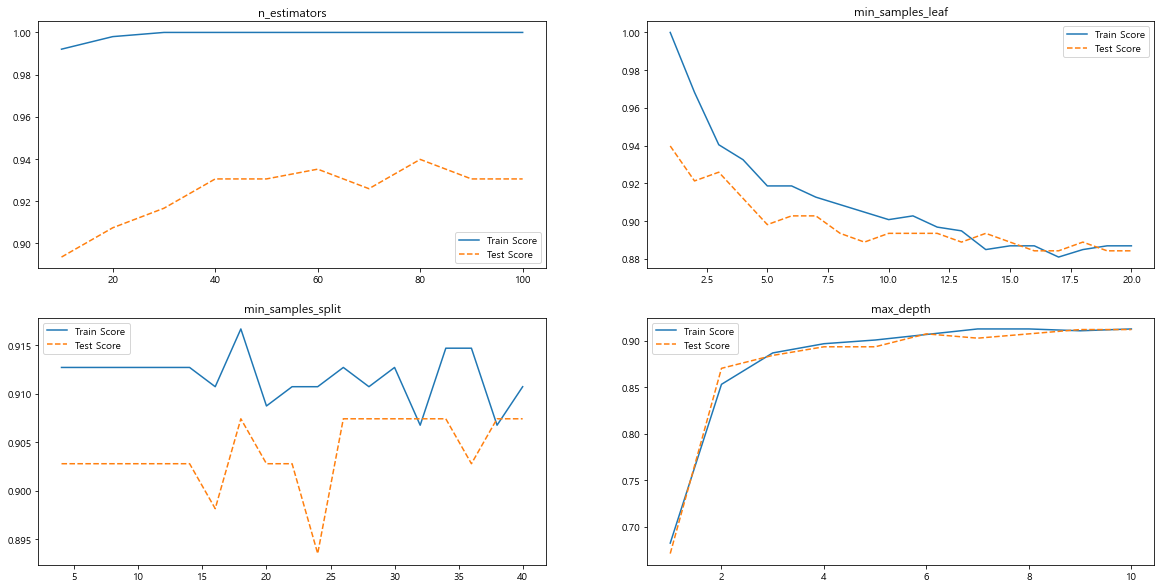

In [89]:
train_score = []; test_score = []

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.figure(figsize=(20,10))    
plt.subplot(2,2,1)    
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('n_estimators')

# --------------
train_score = []; test_score = []

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(2,2,2)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_leaf')

# --------------
train_score = []; test_score = []

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=7, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(2,2,3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_split')

# --------------
train_score = []; test_score = []
for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=7, min_samples_split = 25, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(2,2,4)    
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('max_depth')

In [90]:
rf_final = RandomForestClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=7, min_samples_split = 25, max_depth = 6)

rf_final.fit(df_train_x, df_train_y)
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.907
Score on test set : 0.907


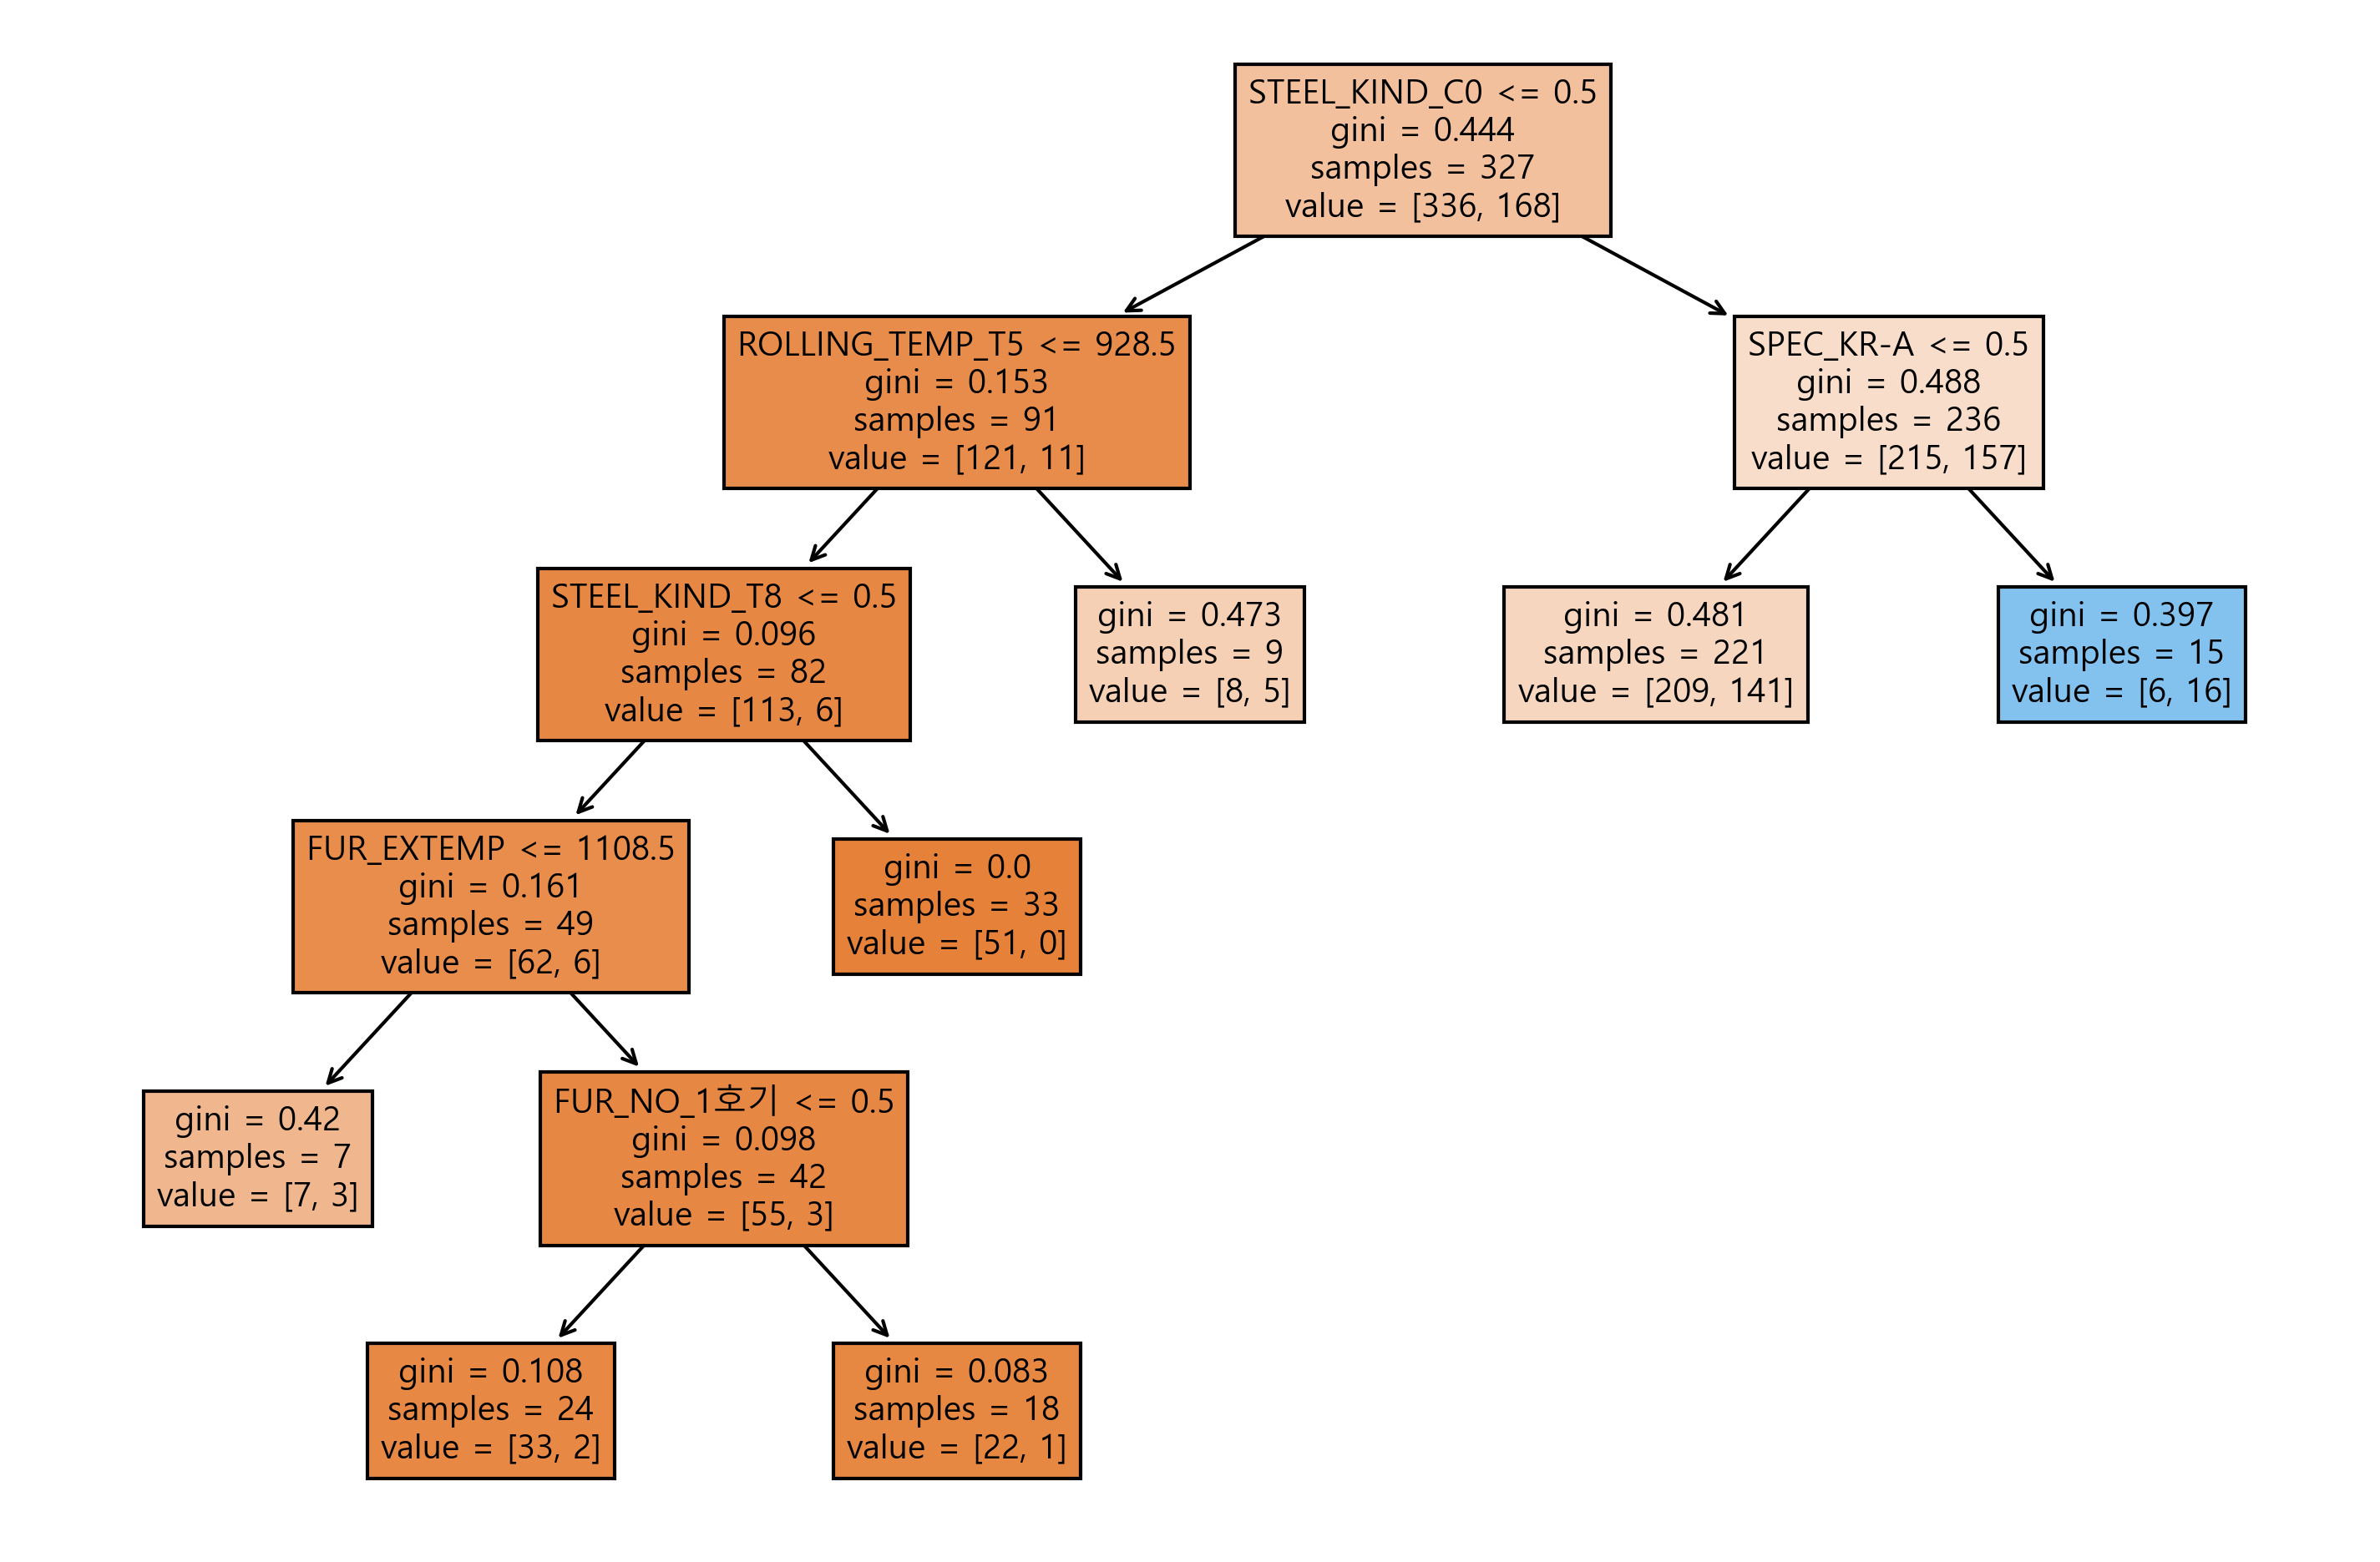

In [91]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);

Text(0.5, 1.0, 'max_depth')

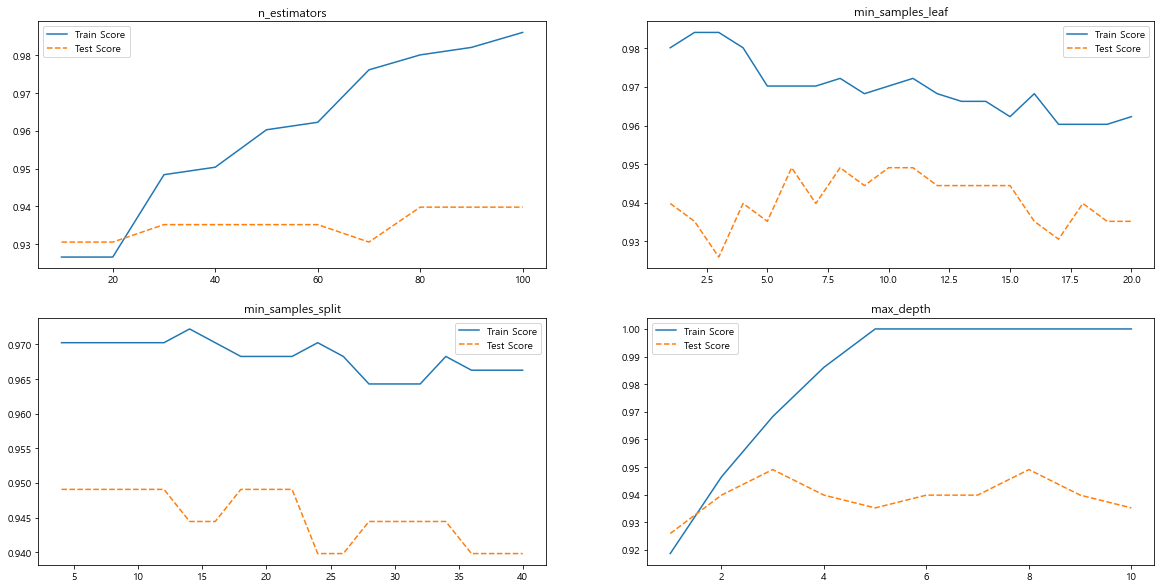

In [94]:
# 그래디언트 부스팅 하이퍼 파라미터 조정

train_score = []; test_score = []

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.figure(figsize=(20,10))    # 시각화를 통해 최적 값 도출
plt.subplot(2,2,1)    
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('n_estimators')

# --------------
train_score = []; test_score = []

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.subplot(2,2,2)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_leaf')

# --------------
train_score = []; test_score = []

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=6, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.subplot(2,2,3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_split')

# --------------
train_score = []; test_score = []
for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf=6, min_samples_split = 20, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.subplot(2,2,4)    
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('max_depth')

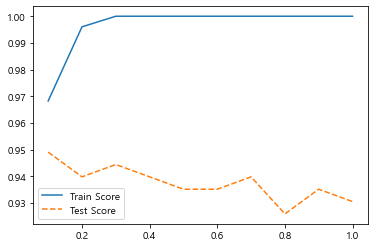

In [96]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1,11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state = 1234, n_estimators = 80, min_samples_leaf = 6, min_samples_split = 20, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.plot(para_lr, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle='--', label = 'Test Score')
plt.legend()

In [99]:
gb_final = GradientBoostingClassifier(random_state=1234,  n_estimators = 80, min_samples_leaf=6, min_samples_split=20, max_depth = 3, learning_rate = 0.1)

gb_final.fit(df_train_x, df_train_y)
print(gb_final.score(df_train_x, df_train_y))
print(gb_final.score(df_test_x, df_test_y))

0.9682539682539683
0.9490740740740741


In [101]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print(nn_uncustomized.score(df_train_x, df_train_y))
print(nn_uncustomized.score(df_test_x, df_test_y))

0.5873015873015873
0.5879629629629629


In [115]:
df_x_num = df_x.select_dtypes(exclude='object')
df_x_obj = df_x.select_dtypes('object')

In [122]:
v_feature = df_x_num.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x_num)
df__x_obj_dummy = pd.get_dummies(df_x_obj)

df_scaled = pd.DataFrame(df_scaled, columns = v_feature)
df_scaled = pd.concat([df_scaled, df__x_obj_dummy], axis=1)

In [123]:
df_scaled

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,0,0,0,1,0,0,0,1,0,0
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,0,0,0,1,0,0,0,1,0,0
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,0,0,1,0,1,0,0,0,1,0
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,0,0,1,0,1,0,0,0,1,0
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.476916,1.493531,0.312308,-0.792904,-0.994460,0.799021,-0.447338,0.816269,-0.511371,-1.224987,...,0,0,0,0,0,1,0,1,0,0
716,-0.741293,0.782392,1.006578,-0.935621,-0.994460,-0.256038,-0.751008,1.101013,-0.549732,-1.379312,...,0,0,0,0,1,0,1,0,0,0
717,-0.661875,1.224921,0.677679,-0.885084,1.005571,0.655149,-0.640583,0.759320,0.064041,-1.180894,...,0,0,0,0,1,0,0,0,0,1
718,-0.714646,1.074191,1.043267,1.566994,1.005571,1.134722,-0.060849,0.759320,-1.163505,-1.269080,...,0,0,0,0,0,1,0,1,0,0


In [126]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
print(nn_scaled.score(df_scaled_train_x, df_train_y))
print(nn_scaled.score(df_scaled_test_x, df_test_y))

0.9880952380952381
0.7777777777777778


In [130]:
para_hidden = [20 * hidden for hidden in range(1,9)]
para_function = ['logistic', 'tanh', 'relu']
para_solver = ['lbfgs', 'sgd', 'adam']
para_batch = [20*batch for batch in range(1,10)]

[0.5714285714285714, 0.3968253968253968, 0.6746031746031746, 0.6884920634920635, 0.6825396825396826, 0.6726190476190477, 0.6825396825396826, 0.6865079365079365, 0.6746031746031746, 0.6706349206349206, 0.6785714285714286, 0.6746031746031746] [0.5138888888888888, 0.4074074074074074, 0.6851851851851852, 0.625, 0.6388888888888888, 0.6666666666666666, 0.6620370370370371, 0.6759259259259259, 0.6898148148148148, 0.6759259259259259, 0.6712962962962963, 0.6805555555555556]


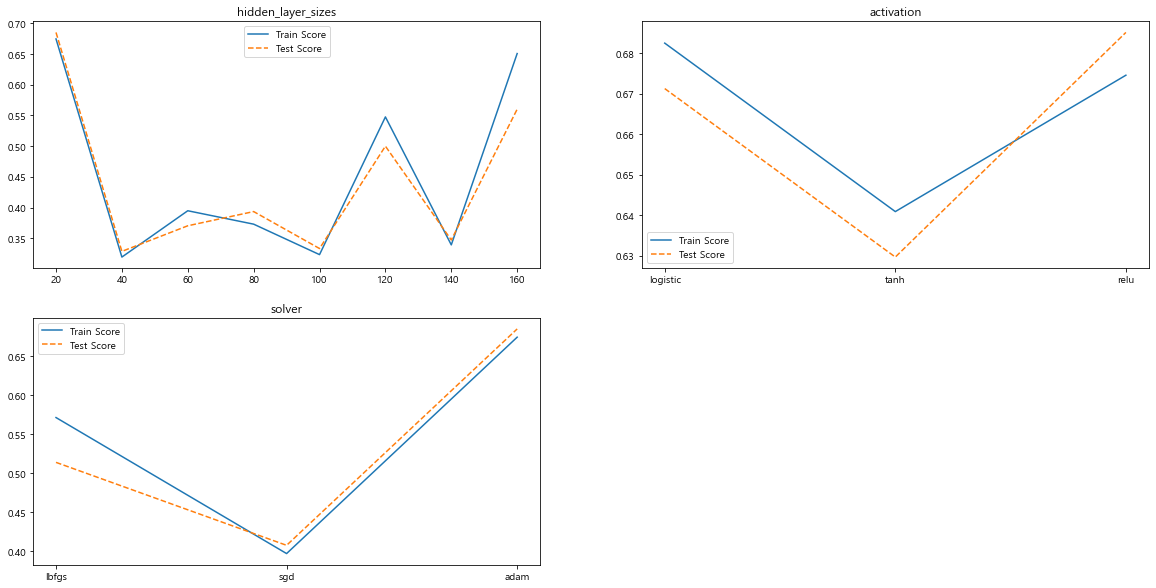

In [136]:
train_score = []; test_score = []

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_scaled_train_x, df_train_y))
    test_score.append(nn.score(df_scaled_test_x, df_test_y))

plt.figure(figsize=(20,10))    # 시각화를 통해 최적 값 도출
plt.subplot(2,2,1)    
plt.plot(para_hidden, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_hidden, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('hidden_layer_sizes')

# --------------
train_score = []; test_score = []

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes = (20,20), activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_scaled_train_x, df_train_y))
    test_score.append(nn.score(df_scaled_test_x, df_test_y))

plt.subplot(2,2,2)
plt.plot(para_function, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_function, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('activation')

# --------------
train_score = []; test_score = []

for v_solver in para_solver:
    nn = MLPClassifier(hidden_layer_sizes = (20,20), activation = 'relu', solver = v_solver, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_scaled_train_x, df_train_y))
    test_score.append(nn.score(df_scaled_test_x, df_test_y))

plt.subplot(2,2,3)
plt.plot(para_solver, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_solver, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('solver')

train_accuracy = []; test_accuracy = []

for v_batch in para_batch:
    nn = MLPClassifier(hidden_layer_sizes = (20,20), activation = 'relu', solver = 'adam', random_state = 1234, batch_size = v_batch)
    nn.fit(df_train_x, df_train_y)
    train_score.append(nn.score(df_scaled_train_x, df_train_y))
    test_score.append(nn.score(df_scaled_test_x, df_test_y))

In [135]:
nn_final = MLPClassifier(batch_size = 120, solver = 'adam', hidden_layer_sizes = (20,20), random_state = 1234, activation = 'relu')
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set : {}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 1.0
Accuracy on test set : 0.769
              precision    recall  f1-score   support

           0      0.842     0.807     0.824       145
           1      0.636     0.690     0.662        71

    accuracy                          0.769       216
   macro avg      0.739     0.749     0.743       216
weighted avg      0.774     0.769     0.771       216



In [152]:
model = ['의사결정나무', '랜덤포레스트', '그래디언트 부스팅', '인공신경망']
train_accuracy = []; test_accuracy = []
model_auc = []
model_precision = []; model_recall = []
model_f1_score = []

In [153]:
train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))
y_pred = tree_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

# ---------------------------------------
train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))
y_pred = rf_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

# ---------------------------------------
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))
y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

# ---------------------------------------
train_accuracy.append(nn_final.score(df_scaled_train_x, df_train_y))
test_accuracy.append(nn_final.score(df_scaled_test_x, df_test_y))
y_pred = nn_final.predict(df_scaled_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [154]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision; df_eval['Recall'] = model_recall
df_eval['F1Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
의사결정나무,0.859,0.838,0.764,0.929,0.549,0.690
랜덤포레스트,0.907,0.907,0.859,1.000,0.718,0.836
그래디언트 부스팅,0.968,0.949,0.923,1.000,0.845,0.916
인공신경망,1.000,0.769,0.749,0.636,0.690,0.662


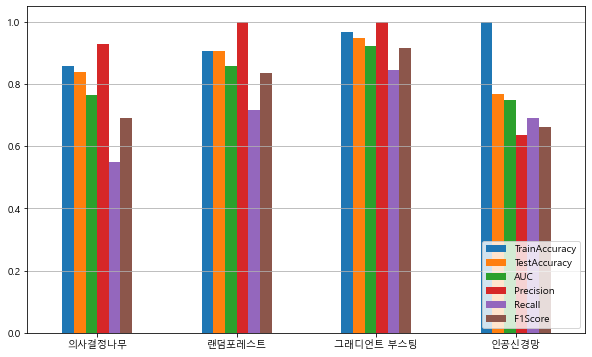

In [155]:
df_eval.plot.bar(rot = 0, figsize = (10,6))
plt.legend(loc='lower right')
plt.grid(axis='y')

Text(0, 0.5, '변수')

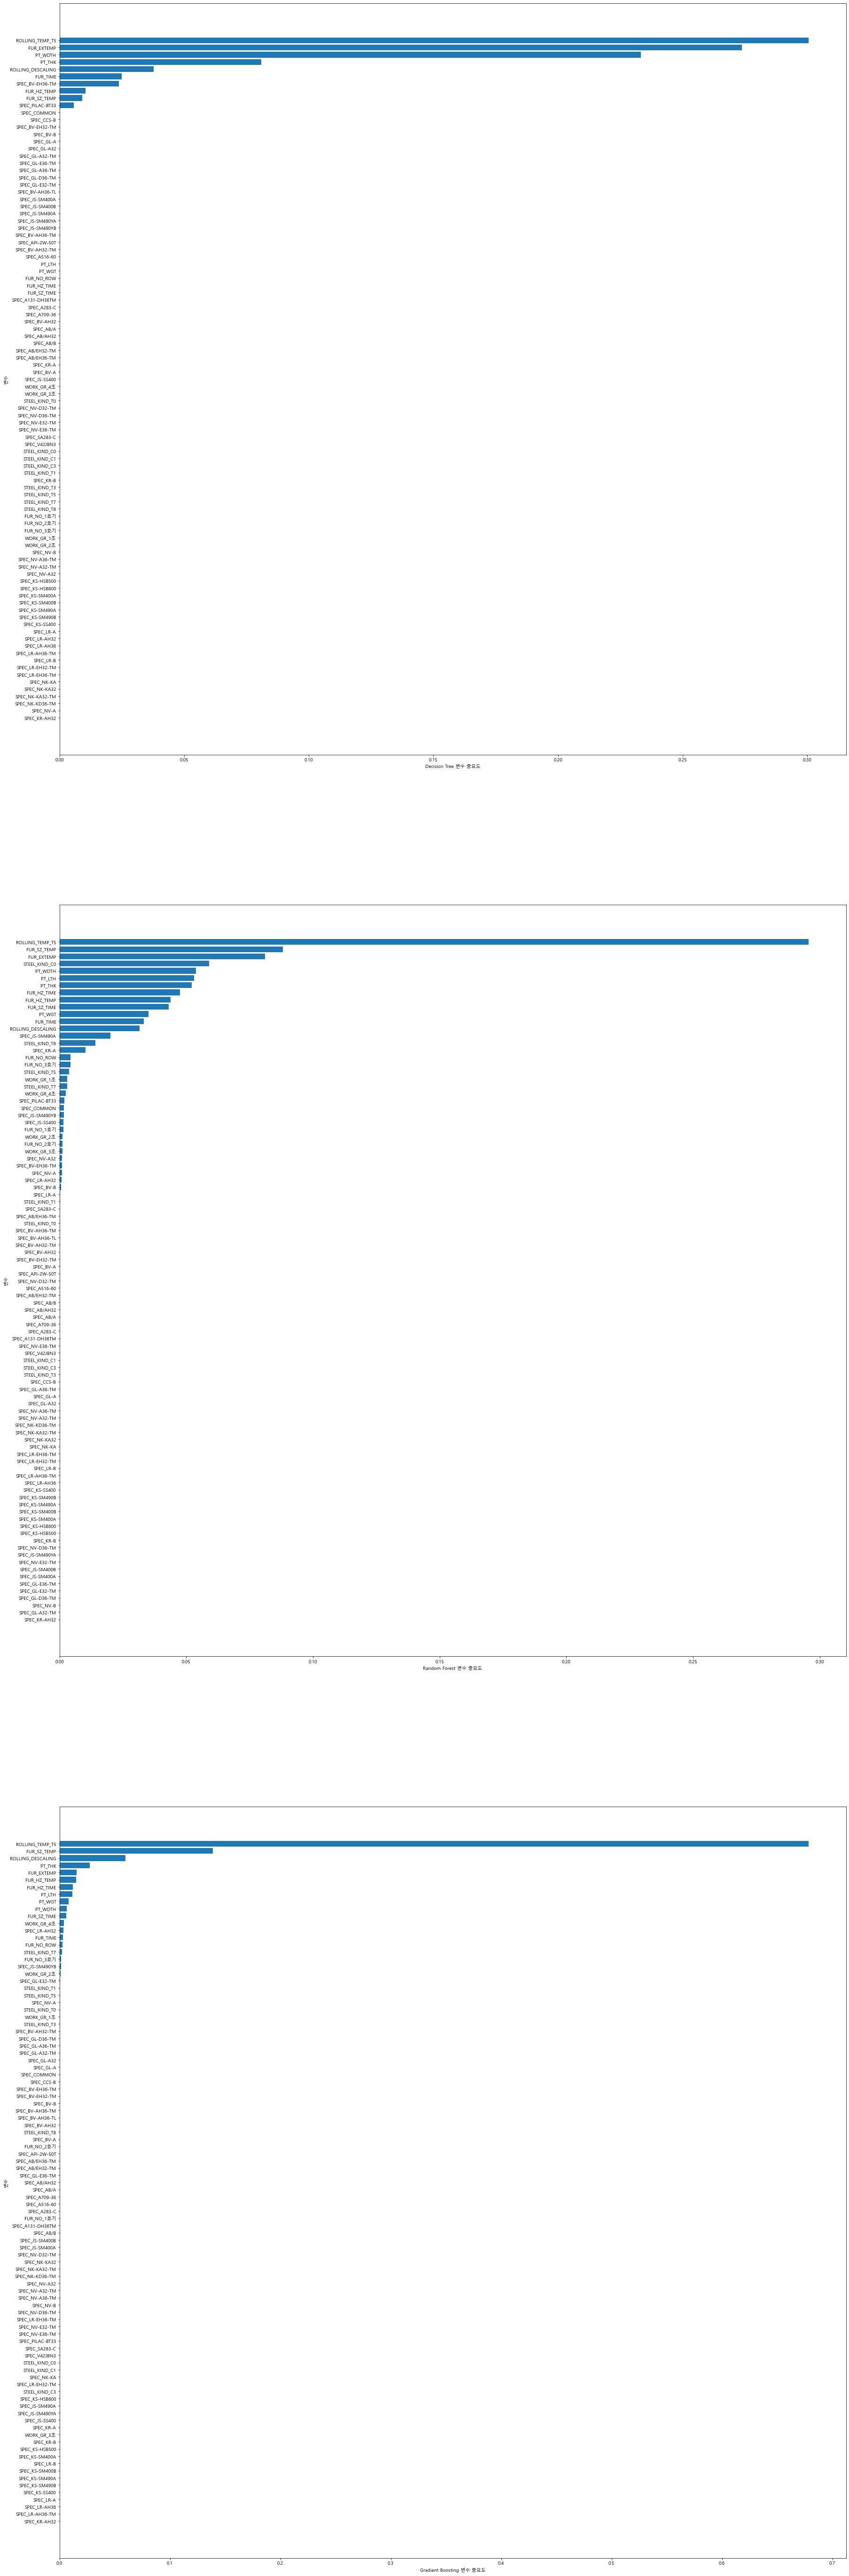

In [161]:
v_feature_name = df_train_x.columns

dt_importance = pd.DataFrame()
dt_importance['Feature'] = v_feature_name
dt_importance['Importance'] = tree_final.feature_importances_
dt_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(dt_importance))

rf_importance = pd.DataFrame()
rf_importance['Feature'] = v_feature_name
rf_importance['Importance'] = rf_final.feature_importances_
rf_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(rf_importance))

gb_importance = pd.DataFrame()
gb_importance['Feature'] = v_feature_name
gb_importance['Importance'] = gb_final.feature_importances_
gb_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(gb_importance))

plt.figure(figsize=(30,100))
plt.subplot(3,1,1)
plt.barh(y = coordinates, width = dt_importance['Importance'])
plt.yticks(coordinates, dt_importance['Feature'])
plt.xlabel('Decision Tree 변수 중요도')
plt.ylabel('변수')

plt.subplot(3,1,2)
plt.barh(y = coordinates, width = rf_importance['Importance'])
plt.yticks(coordinates, rf_importance['Feature'])
plt.xlabel('Random Forest 변수 중요도')
plt.ylabel('변수')

plt.subplot(3,1,3)
plt.barh(y = coordinates, width = gb_importance['Importance'])
plt.yticks(coordinates, gb_importance['Feature'])
plt.xlabel('Gradient Boosting 변수 중요도')
plt.ylabel('변수')

In [179]:
df_x_num = df_x.select_dtypes(exclude='object')
df_x_obj = df_x.select_dtypes('object')
v_feature = df_x_num.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x_num)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature)
df_scaled = pd.concat([df_scaled, df_x_obj], axis=1)
df_scaled['SCALE'] = df_y

In [180]:
df_x = df_scaled.drop('SCALE', axis=1)
df_y = df_scaled['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print(df_train.shape); print(df_test.shape)

(504, 19)
(216, 19)


In [182]:
log_model = Logit.from_formula("""SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_NO_ROW + FUR_HZ_TEMP +
       FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP +
       ROLLING_TEMP_T5 + ROLLING_DESCALING + C(FUR_NO) +
       C(WORK_GR)""", df_scaled)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.370878
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  720
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                           18
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.4090
Time:                        05:04:39   Log-Likelihood:                -267.03
converged:                       True   LL-Null:                       -451.80
Covariance Type:            nonrobust   LLR p-value:                 2.015e-67
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3327      0.279     -4.777      0.000      -1.879      -0.786
C(FUR_NO

Text(0.5, 0, '변수 중요도')

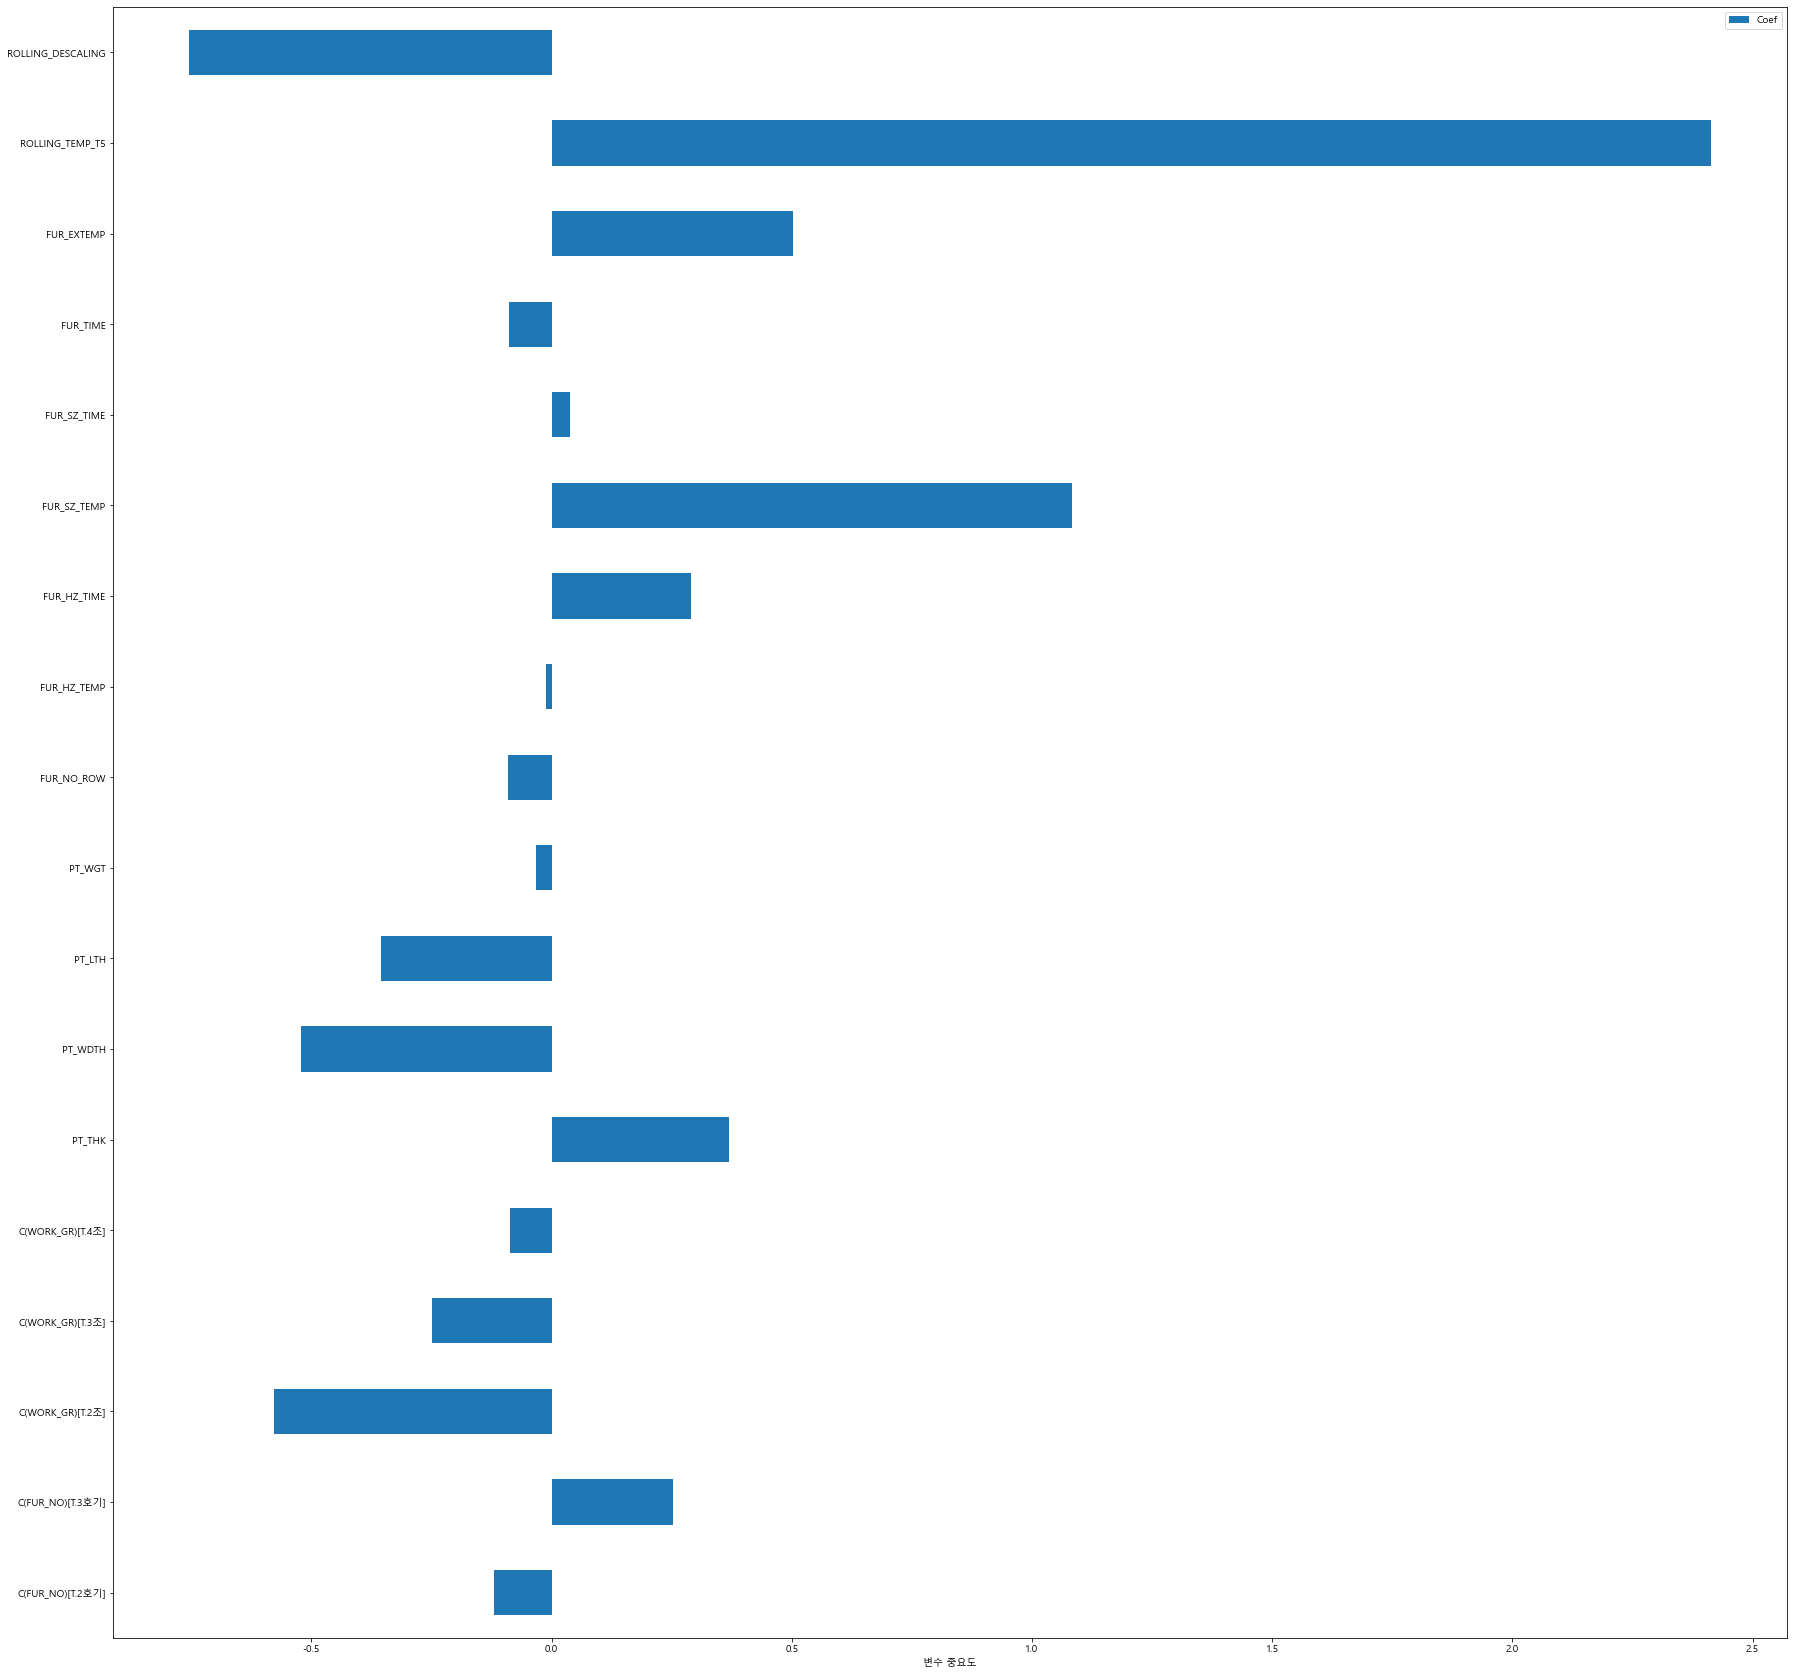

In [219]:
df_logistic_coef = pd.DataFrame({'Coef' : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef', figsize=(30,30))
plt.xlabel('변수 중요도')

NameError: name 'skikit' is not defined